In [102]:
from itertools import combinations
from collections import Counter
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load multiple CSV files into one dataframe
dataframes = []
months = ["January", "February", "March", "April", "May", "June", "July",
          "August", "September", "October", "November", "December"]

for month in months:
    dataframes.append(pd.read_csv(f"./sales-data/Sales_{month}_2019.csv"))


df = pd.concat(dataframes, axis=0, ignore_index=True)
df.dropna(subset=["Order Date"], inplace=True)
df.drop(df[df["Order Date"] == "Order Date"].index, inplace=True)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
# Save all months data into csv fie
df.to_csv("all_data.csv", index=False)

# What was the best month for sales? How much money was earned that month?

## 1. Create month column

In [4]:
print(df.columns)

# get function that will convert 01/22/19 21:25 to month name
# add new column which will have month name as string
# Iterate over months and count Price*Quantity

def get_month_name(date: str) -> str:
    months = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December',
    }
    date_part = date.split(" ")[0]
    date = datetime.datetime.strptime(date_part, '%m/%d/%y')
    return months[date.month]


df["Month"] = df.apply(lambda x: get_month_name(x['Order Date']), axis=1)
df.head()



Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January


In [70]:
df[df["Month"] == 'December'].size

199872

## 2. Add total column

In [5]:
# Convert Price Each and Quantity Ordered to numeric types
# df = df.astype({'Quantity Ordered': 'int32', "Price Each": "float32"})
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [6]:
df["Total"] = round(df["Quantity Ordered"] * df["Price Each"], 2)
cols = list(df.columns.values)
df = df[cols[:4] + [cols[-1]] + cols[4:-1]]


## 3. Finally group rows by month and check wich month was the best

In [7]:
# Order dataframe by months
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

In [8]:
results = df.groupby("Month").sum()
results.sort_values(["Total"], ascending=False)

,Quantity Ordered,Price Each,Total
Month,,,
December,28114,4.588415e+06,4.613443e+06
October,22703,3.715555e+06,3.736727e+06
April,20558,3.367671e+06,3.390670e+06
November,19798,3.180601e+06,3.199603e+06
May,18667,3.135125e+06,3.152607e+06
March,17005,2.791208e+06,2.807100e+06
July,16072,2.632540e+06,2.647776e+06
June,15253,2.562026e+06,2.577802e+06
August,13448,2.230345e+06,2.244468e+06


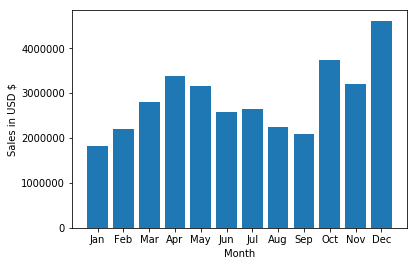

In [9]:
months = list(df["Month"].unique())
for i in range(len(months)):
    months[i] = months[i][:3]

plt.bar(months, results["Total"])
plt.xlabel("Month")
plt.ylabel("Sales in USD $")
plt.show()

# What city has a highest number of sales?

In [55]:
def get_state(address):
    return address.split(",")[2][:3].strip()

def get_city(address):
    return address.split(",")[1].strip()


df["City"] = df["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
# One way with regular expressions
# pattern = re.compile(r', ([a-zA-Z\s]*),')
# df["City"] = df["Purchase Address"].str.extract(pat=pattern)
# df["State"] = df["Purchase Address"].apply(lambda x: get_state(x))

In [56]:
results = df.groupby("City").sum()
results.sort_values(["Total"], ascending=False)

,Quantity Ordered,Price Each,Total
City,,,
San Francisco (CA),50239,8.211462e+06,8.262204e+06
Los Angeles (CA),33289,5.421435e+06,5.452571e+06
New York City (NY),27932,4.635371e+06,4.664317e+06
Boston (MA),22528,3.637410e+06,3.661642e+06
Atlanta (GA),16602,2.779908e+06,2.795499e+06
Dallas (TX),16730,2.752628e+06,2.767975e+06
Seattle (WA),16553,2.733296e+06,2.747755e+06
Portland (OR),11303,1.860558e+06,1.870732e+06
Austin (TX),11153,1.809874e+06,1.819582e+06


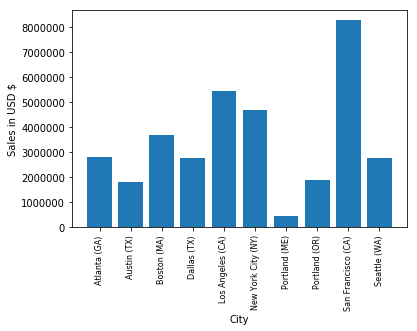

In [61]:
# Doesn't brake order
cities = [city for city, df in df.groupby("City")]

plt.bar(cities, results["Total"])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel("City")
plt.ylabel("Sales in USD $")
plt.show()

# What time should we display advertisements to maximize likelihood of customer's buying product?

In [79]:
# Convert Order Date column to datetime column
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [81]:
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute

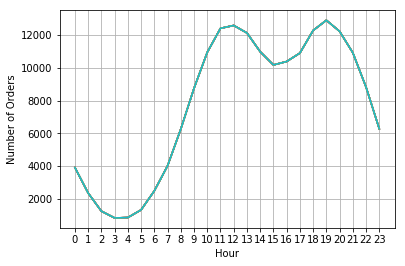

In [87]:
hours = [hour for hour, df in df.groupby("Hour")]

# Number of all sales at specific hour
plt.plot(hours, df.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

# What products are most often sold together?

In [105]:
duplicates_df = df[df["Order ID"].duplicated(keep=False)]
duplicates_df["Grouped"] = duplicates_df.groupby(["Order ID"])["Product"].transform(lambda x: ",".join(x))
duplicates_df = duplicates_df[["Order ID", "Grouped"]].drop_duplicates()

duplicates_df

/home/flush/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
228,141457,"iPhone,Apple Airpods Headphones"
250,141478,"Google Phone,Apple Airpods Headphones"
323,141550,"iPhone,Apple Airpods Headphones,Wired Headphones"
362,141587,"USB-C Charging Cable,Apple Airpods Headphones"
421,141645,"Lightning Charging Cable,Wired Headphones"


In [108]:
counter = Counter()

for row in duplicates_df["Grouped"]:
    row_list = row.split(",")
    counter.update(Counter(combinations(row_list, 2)))
    

print(counter.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


# What product was selled the most?

In [129]:
# product_group = df.groupby(["Product"])["Product"].count()
# results.sort_values(ascending=False)

product_group = df.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
quantity_ordered.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

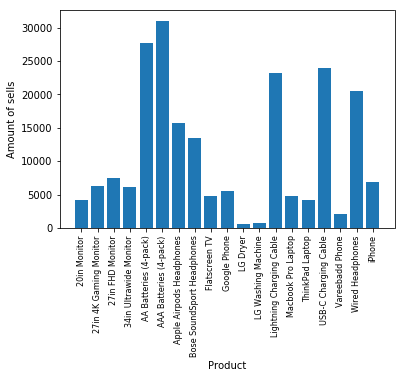

In [130]:
products = [prod for prod, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel("Product")
plt.ylabel("Amount of sells")
plt.show()

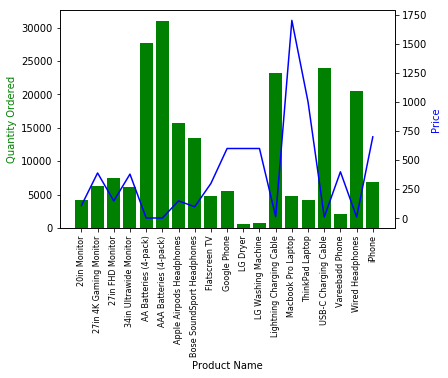

In [140]:
prices = df.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel("Price", color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()